In [1]:
import pandas as pd
import json 
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = os.path.join("draftcombinedrillresults2018.json")
with open(filepath) as jsonfile:
    nba_json = json.load(jsonfile)

nba_json    

{'parameters': {'LeagueID': '00', 'SeasonYear': '2018-19'},
 'resource': 'draftcombinedrillresults',
 'resultSets': [{'headers': ['TEMP_PLAYER_ID',
    'PLAYER_ID',
    'FIRST_NAME',
    'LAST_NAME',
    'PLAYER_NAME',
    'POSITION',
    'STANDING_VERTICAL_LEAP',
    'MAX_VERTICAL_LEAP',
    'LANE_AGILITY_TIME',
    'MODIFIED_LANE_AGILITY_TIME',
    'THREE_QUARTER_SPRINT',
    'BENCH_PRESS'],
   'name': 'Results',
   'rowSet': [[1628959,
     1628959,
     'Rawle',
     'Alkins',
     'Rawle Alkins',
     'SG',
     32.5,
     40.5,
     11.5,
     3.09,
     3.15,
     10],
    [1628960,
     1628960,
     'Grayson',
     'Allen',
     'Grayson Allen',
     'SG',
     32.5,
     40.5,
     10.31,
     3.04,
     3.15,
     None],
    [1628961,
     1628961,
     'Kostas',
     'Antetokounmpo',
     'Kostas Antetokounmpo',
     'PF',
     29.5,
     35.0,
     12.48,
     3.48,
     3.21,
     0],
    [1628962,
     1628962,
     'Udoka',
     'Azubuike',
     'Udoka Azubuike',
     '

In [37]:
df = pd.DataFrame.from_dict(nba_json['resultSets'][0]['rowSet'], orient='columns')
table = df[[4, 5, 6, 7, 8, 9, 10, 11]]
table.columns = ['Name', 'Position', 'Standing Vertical(in)', 'Max Vertical(in)', 'Lane Agility(sec)', 'Mod Lane Agility(sec)', 'Three Quarter Sprint', 'Bench Press']
table.head()

Name Position  Standing Vertical(in)  Max Vertical(in)  \
0          Rawle Alkins       SG                   32.5              40.5   
1         Grayson Allen       SG                   32.5              40.5   
2  Kostas Antetokounmpo       PF                   29.5              35.0   
3        Udoka Azubuike        C                   31.0              31.5   
4         Mohamed Bamba        C                    NaN               NaN   

   Lane Agility(sec)  Mod Lane Agility(sec)  Three Quarter Sprint  Bench Press  
0              11.50                   3.09                  3.15         10.0  
1              10.31                   3.04                  3.15          NaN  
2              12.48                   3.48                  3.21          0.0  
3              12.97                   3.65                  3.12         11.0  
4                NaN                    NaN                   NaN          NaN

In [4]:
combine2018 = table.fillna(0)
combine2018.head()

Name Position  Standing Vertical(in)  Max Vertical(in)  \
0          Rawle Alkins       SG                   32.5              40.5   
1         Grayson Allen       SG                   32.5              40.5   
2  Kostas Antetokounmpo       PF                   29.5              35.0   
3        Udoka Azubuike        C                   31.0              31.5   
4         Mohamed Bamba        C                    0.0               0.0   

   Lane Agility(sec)  Mod Lane Agility(sec)  Three Quarter Sprint  Bench Press  
0              11.50                   3.09                  3.15         10.0  
1              10.31                   3.04                  3.15          0.0  
2              12.48                   3.48                  3.21          0.0  
3              12.97                   3.65                  3.12         11.0  
4               0.00                   0.00                  0.00          0.0

In [5]:
combine2018.groupby("Position").count()

Name  Standing Vertical(in)  Max Vertical(in)  Lane Agility(sec)  \
Position                                                                     
C            7                      7                 7                  7   
C-PF         3                      3                 3                  3   
PF           7                      7                 7                  7   
PF-C         4                      4                 4                  4   
PG          13                     13                13                 13   
PG-SG        1                      1                 1                  1   
SF           5                      5                 5                  5   
SF-PF        1                      1                 1                  1   
SF-SG        4                      4                 4                  4   
SG          14                     14                14                 14   
SG-PG        4                      4                 4                  4   
SG-SF        6                      6                 6                  6   

          Mod Lane Agility(sec)  Three Quarter Sprint  Bench Press  
Position                                                            
C                             7                     7            7  
C-PF                          3                     3            3  
PF                            7                     7            7  
PF-C                          4                     4            4  
PG                           13                    13           13  
PG-SG                         1                     1            1  
SF                            5                     5            5  
SF-PF                         1                     1            1  
SF-SG                         4                     4            4  
SG                           14                    14           14  
SG-PG                         4                     4            4  
SG-SF                         6                     6            6

In [6]:
combine2018['Position']=combine2018['Position'].replace(to_replace='C-PF', value='F-C')
combine2018['Position']=combine2018['Position'].replace(to_replace='PF-C', value='F-C')
combine2018['Position']=combine2018['Position'].replace(to_replace='SG-SF', value='F-G')
combine2018['Position']=combine2018['Position'].replace(to_replace='PG-SG', value='G')
combine2018['Position']=combine2018['Position'].replace(to_replace='SF-PF', value='F')
combine2018['Position']=combine2018['Position'].replace(to_replace='SF-SG', value='F-G')
combine2018['Position']=combine2018['Position'].replace(to_replace='SG-PG', value='G')

In [7]:
filepath2 = os.path.join("draftcombinedrillresults2008.json")
with open(filepath2) as jsonfile:
    nba_json2 = json.load(jsonfile)

nba_json2    

{'parameters': {'LeagueID': '00', 'SeasonYear': '2007-08'},
 'resource': 'draftcombinedrillresults',
 'resultSets': [{'headers': ['TEMP_PLAYER_ID',
    'PLAYER_ID',
    'FIRST_NAME',
    'LAST_NAME',
    'PLAYER_NAME',
    'POSITION',
    'STANDING_VERTICAL_LEAP',
    'MAX_VERTICAL_LEAP',
    'LANE_AGILITY_TIME',
    'MODIFIED_LANE_AGILITY_TIME',
    'THREE_QUARTER_SPRINT',
    'BENCH_PRESS'],
   'name': 'Results',
   'rowSet': [[None,
     12204,
     'Mohamed',
     'Abukar',
     'Mohamed Abukar',
     'SF',
     30.5,
     35.0,
     11.78,
     None,
     3.37,
     15],
    [None,
     12205,
     'Mario',
     'Boggan',
     'Mario Boggan',
     'PF',
     24.0,
     26.5,
     12.18,
     None,
     3.45,
     12],
    [None,
     12206,
     'Craig',
     'Bradshaw',
     'Craig Bradshaw',
     'PF',
     26.0,
     28.0,
     11.88,
     None,
     3.54,
     12],
    [None,
     201147,
     'Corey',
     'Brewer',
     'Corey Brewer',
     'SF-SG',
     30.5,
     36.5,
   

In [8]:
df2 = pd.DataFrame.from_dict(nba_json2['resultSets'][0]['rowSet'], orient='columns')
table2 = df2[[4, 5, 6, 7, 8, 9, 10, 11]]
table2.columns = ['Name', 'Position', 'Standing Vertical(in)', 'Max Vertical(in)', 'Lane Agility(sec)', 'Mod Lane Agility(sec)', 'Three Quarter Sprint', 'Bench Press']
table2.head()

Name Position  Standing Vertical(in)  Max Vertical(in)  \
0  Mohamed Abukar       SF                   30.5              35.0   
1    Mario Boggan       PF                   24.0              26.5   
2  Craig Bradshaw       PF                   26.0              28.0   
3    Corey Brewer    SF-SG                   30.5              36.5   
4    Aaron Brooks       PG                   32.5              39.5   

   Lane Agility(sec) Mod Lane Agility(sec)  Three Quarter Sprint  Bench Press  
0              11.78                  None                  3.37         15.0  
1              12.18                  None                  3.45         12.0  
2              11.88                  None                  3.54         12.0  
3              11.69                  None                  3.22         11.0  
4              10.57                  None                  3.20          6.0

In [9]:
combine2008 = table2.fillna(0)
combine2008.head()

Name Position  Standing Vertical(in)  Max Vertical(in)  \
0  Mohamed Abukar       SF                   30.5              35.0   
1    Mario Boggan       PF                   24.0              26.5   
2  Craig Bradshaw       PF                   26.0              28.0   
3    Corey Brewer    SF-SG                   30.5              36.5   
4    Aaron Brooks       PG                   32.5              39.5   

   Lane Agility(sec)  Mod Lane Agility(sec)  Three Quarter Sprint  Bench Press  
0              11.78                      0                  3.37         15.0  
1              12.18                      0                  3.45         12.0  
2              11.88                      0                  3.54         12.0  
3              11.69                      0                  3.22         11.0  
4              10.57                      0                  3.20          6.0

In [10]:
combine2008['Position']=combine2008['Position'].replace(to_replace='C-PF', value='F-C')
combine2008['Position']=combine2008['Position'].replace(to_replace='PF-C', value='F-C')
combine2008['Position']=combine2008['Position'].replace(to_replace='SG-SF', value='F-G')
combine2008['Position']=combine2008['Position'].replace(to_replace='PG-SG', value='G')
combine2008['Position']=combine2008['Position'].replace(to_replace='SF-PF', value='F')
combine2008['Position']=combine2008['Position'].replace(to_replace='SF-SG', value='F-G')
combine2008['Position']=combine2008['Position'].replace(to_replace='SG-PG', value='G')

In [11]:
combine18 = combine2018.groupby("Position").mean()
vert18 = combine18[["Standing Vertical(in)", "Max Vertical(in)"]]
vert18.columns = [["Standing Vertical 2018", "Max Vertical 2018"]]
vert18

Standing Vertical 2018 Max Vertical 2018
Position                                         
C                     21.000000         23.857143
F                      0.000000          0.000000
F-C                   19.642857         24.000000
F-G                   29.950000         36.950000
G                     30.500000         36.400000
PF                    22.857143         28.142857
PG                    20.346154         25.384615
SF                    16.400000         20.300000
SG                    29.107143         35.714286

In [12]:
combine08 = combine2008.groupby("Position").mean()
vert08 = combine08[["Standing Vertical(in)", "Max Vertical(in)"]]
vert08.columns = [["Standing Vertical 2008", "Max Vertical 2008"]]
vert08

Standing Vertical 2008 Max Vertical 2008
Position                                         
                       0.000000          0.000000
C                     28.062500         31.812500
F                     27.250000         33.500000
F-C                   25.000000         29.750000
F-G                   32.833333         37.000000
G                     31.250000         34.750000
PF                    27.090909         31.181818
PG                    30.433333         35.500000
SF                    30.272727         34.863636
SG                    29.318182         34.636364

In [13]:
vert08.drop(vert08.index[0])

Standing Vertical 2008 Max Vertical 2008
Position                                         
C                     28.062500         31.812500
F                     27.250000         33.500000
F-C                   25.000000         29.750000
F-G                   32.833333         37.000000
G                     31.250000         34.750000
PF                    27.090909         31.181818
PG                    30.433333         35.500000
SF                    30.272727         34.863636
SG                    29.318182         34.636364

In [14]:
filepath3 = os.path.join("draftcombinedrillresults2000.json")
with open(filepath3) as jsonfile:
    nba_json3 = json.load(jsonfile)

nba_json3    

{'parameters': {'LeagueID': '00', 'SeasonYear': '2000-01'},
 'resource': 'draftcombinedrillresults',
 'resultSets': [{'headers': ['TEMP_PLAYER_ID',
    'PLAYER_ID',
    'FIRST_NAME',
    'LAST_NAME',
    'PLAYER_NAME',
    'POSITION',
    'STANDING_VERTICAL_LEAP',
    'MAX_VERTICAL_LEAP',
    'LANE_AGILITY_TIME',
    'MODIFIED_LANE_AGILITY_TIME',
    'THREE_QUARTER_SPRINT',
    'BENCH_PRESS'],
   'name': 'Results',
   'rowSet': [[None,
     2124,
     'Malik',
     'Allen',
     'Malik Allen',
     'PF-C',
     25.5,
     29.0,
     11.83,
     None,
     3.38,
     13],
    [None,
     12019,
     'Harold',
     'Arceneaux',
     'Harold Arceneaux',
     'SG-SF',
     None,
     29.0,
     13.8,
     None,
     None,
     0],
    [None,
     12020,
     'Lamont',
     'Barnes',
     'Lamont Barnes',
     'PF-C',
     28.0,
     29.5,
     12.3,
     None,
     3.4,
     10],
    [None,
     12131,
     'Mario',
     'Bland',
     'Mario Bland',
     'PF',
     27.0,
     31.0,
     13

In [15]:
df3 = pd.DataFrame.from_dict(nba_json3['resultSets'][0]['rowSet'], orient='columns')
table3 = df3[[4, 5, 6, 7, 8, 10, 11]]
table3.columns = ['Name', 'Position', 'Standing Vertical(in)', 'Max Vertical(in)', 'Lane Agility(sec)', 'Three Quarter Sprint', 'Bench Press']
table3.head()

Name Position  Standing Vertical(in)  Max Vertical(in)  \
0       Malik Allen     PF-C                   25.5              29.0   
1  Harold Arceneaux    SG-SF                    NaN              29.0   
2     Lamont Barnes     PF-C                   28.0              29.5   
3       Mario Bland       PF                   27.0              31.0   
4     Primoz Brezec        C                   26.0              29.5   

   Lane Agility(sec)  Three Quarter Sprint  Bench Press  
0              11.83                  3.38         13.0  
1              13.80                   NaN          0.0  
2              12.30                  3.40         10.0  
3              13.04                  3.47         15.0  
4              11.53                  3.55          NaN

In [16]:
combine2000 = table3.fillna(0)
combine2000.head()

Name Position  Standing Vertical(in)  Max Vertical(in)  \
0       Malik Allen     PF-C                   25.5              29.0   
1  Harold Arceneaux    SG-SF                    0.0              29.0   
2     Lamont Barnes     PF-C                   28.0              29.5   
3       Mario Bland       PF                   27.0              31.0   
4     Primoz Brezec        C                   26.0              29.5   

   Lane Agility(sec)  Three Quarter Sprint  Bench Press  
0              11.83                  3.38         13.0  
1              13.80                  0.00          0.0  
2              12.30                  3.40         10.0  
3              13.04                  3.47         15.0  
4              11.53                  3.55          0.0

In [17]:
combine2000['Position']=combine2000['Position'].replace(to_replace='C-PF', value='F-C')
combine2000['Position']=combine2000['Position'].replace(to_replace='PF-C', value='F-C')
combine2000['Position']=combine2000['Position'].replace(to_replace='SG-SF', value='F-G')
combine2000['Position']=combine2000['Position'].replace(to_replace='PG-SG', value='G')
combine2000['Position']=combine2000['Position'].replace(to_replace='SF-PF', value='F')
combine2000['Position']=combine2000['Position'].replace(to_replace='SF-SG', value='F-G')
combine2000['Position']=combine2000['Position'].replace(to_replace='SG-PG', value='G')

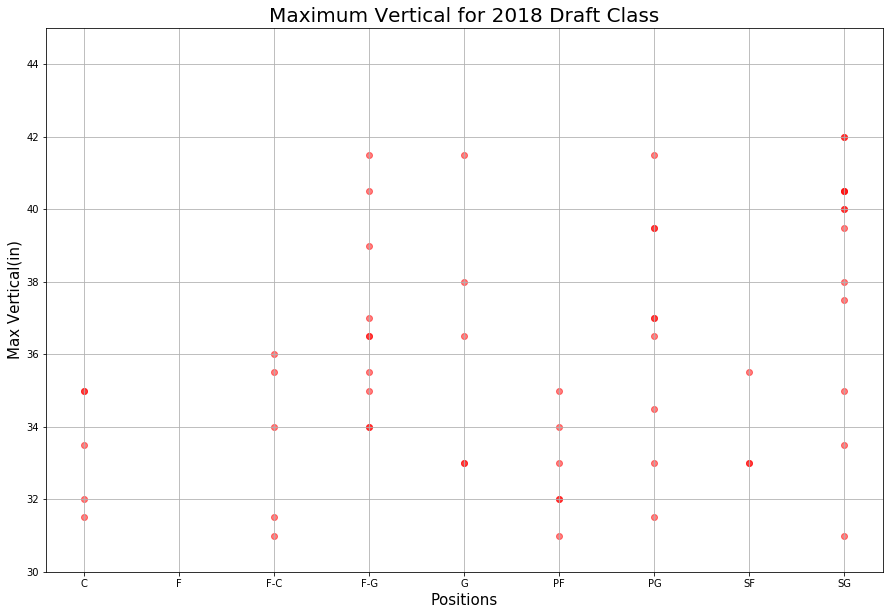

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(combine2018["Position"], combine2018["Max Vertical(in)"], c='red', alpha=0.5)
plt.ylim(30,45)
plt.xlabel('Positions', fontsize=15)
plt.ylabel('Max Vertical(in)', fontsize=15)
plt.title('Maximum Vertical for 2018 Draft Class', fontsize=20)
plt.grid()
plt.show()

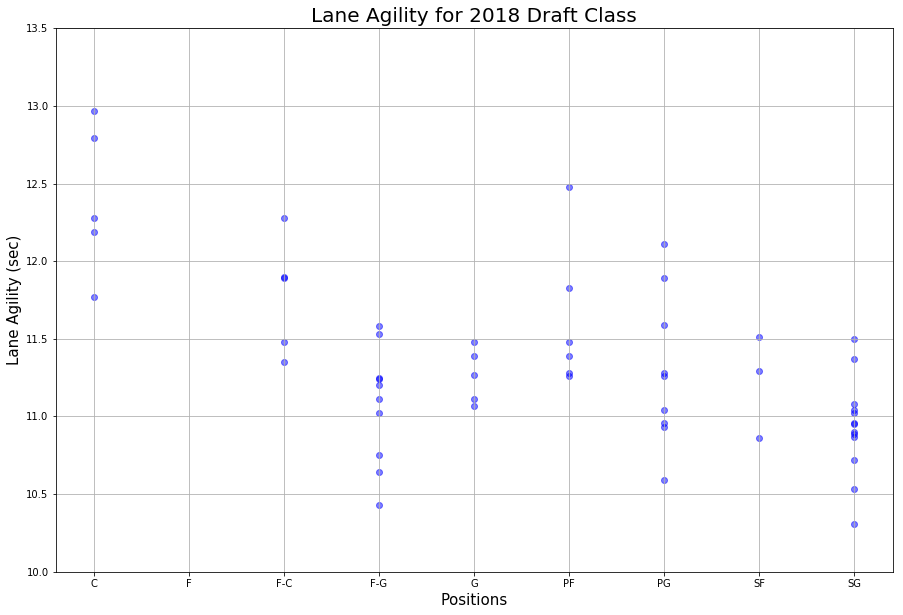

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(combine2018["Position"], combine2018["Lane Agility(sec)"], c='blue', alpha=0.5)
plt.ylim(10,13.5)
plt.xlabel('Positions', fontsize=15)
plt.ylabel('Lane Agility (sec)', fontsize=15)
plt.title('Lane Agility for 2018 Draft Class', fontsize=20)
plt.grid()
plt.show()

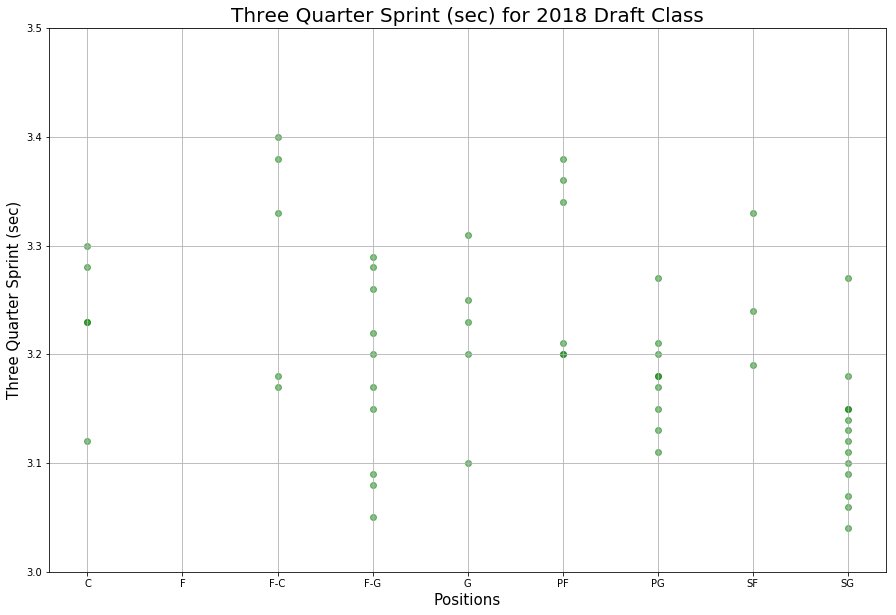

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(combine2018["Position"], combine2018["Three Quarter Sprint"], c='green', alpha=0.5)
plt.ylim(3,3.5)
plt.xlabel('Positions', fontsize=15)
plt.ylabel('Three Quarter Sprint (sec)', fontsize=15)
plt.title('Three Quarter Sprint (sec) for 2018 Draft Class', fontsize=20)
plt.grid()
plt.show()

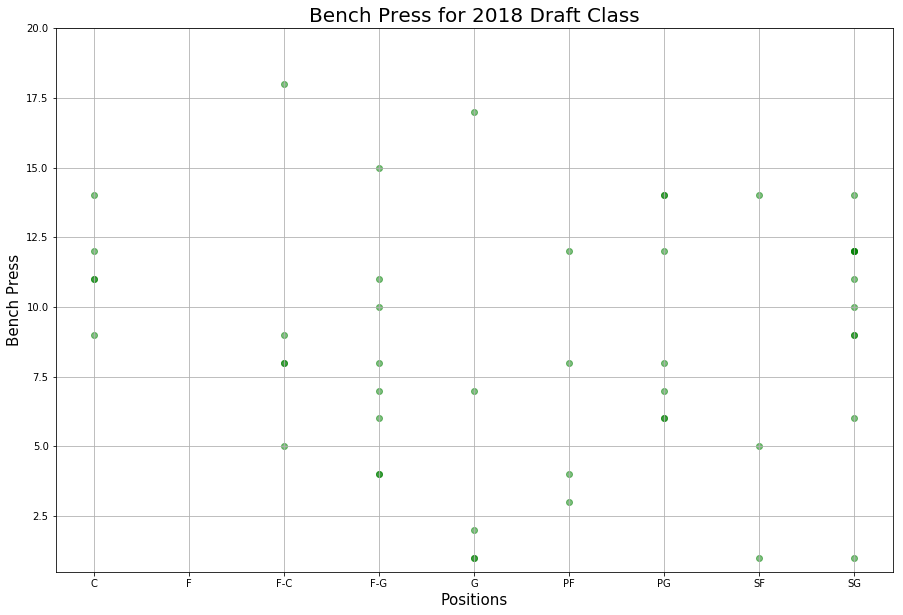

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(combine2018["Position"], combine2018["Bench Press"], c='green', alpha=0.5)
plt.ylim(.5,20)
plt.xlabel('Positions', fontsize=15)
plt.ylabel('Bench Press', fontsize=15)
plt.title('Bench Press for 2018 Draft Class', fontsize=20)
plt.grid()
plt.show()

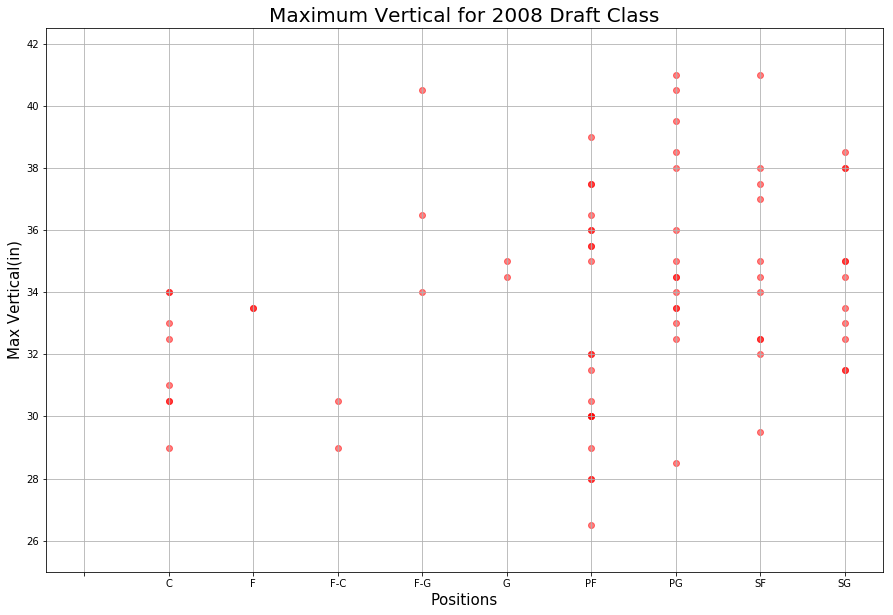

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(combine2008["Position"], combine2008["Max Vertical(in)"], c='red', alpha=0.5)
plt.ylim(25,42.5)
plt.xlabel('Positions', fontsize=15)
plt.ylabel('Max Vertical(in)', fontsize=15)
plt.title('Maximum Vertical for 2008 Draft Class', fontsize=20)
plt.grid()
plt.show()

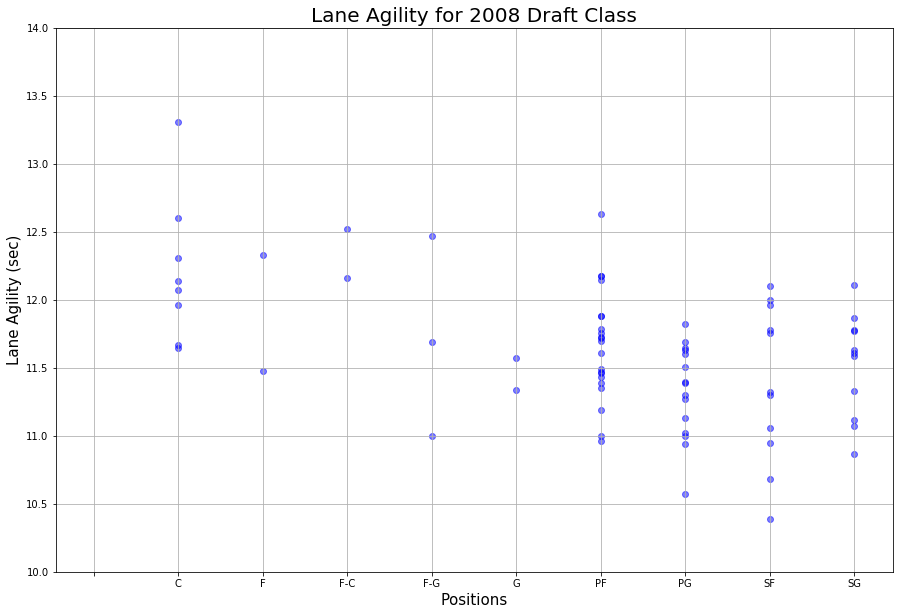

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(combine2008["Position"], combine2008["Lane Agility(sec)"], c='blue', alpha=0.5)
plt.ylim(10,14)
plt.xlabel('Positions', fontsize=15)
plt.ylabel('Lane Agility (sec)', fontsize=15)
plt.title('Lane Agility for 2008 Draft Class', fontsize=20)
plt.grid()
plt.show()

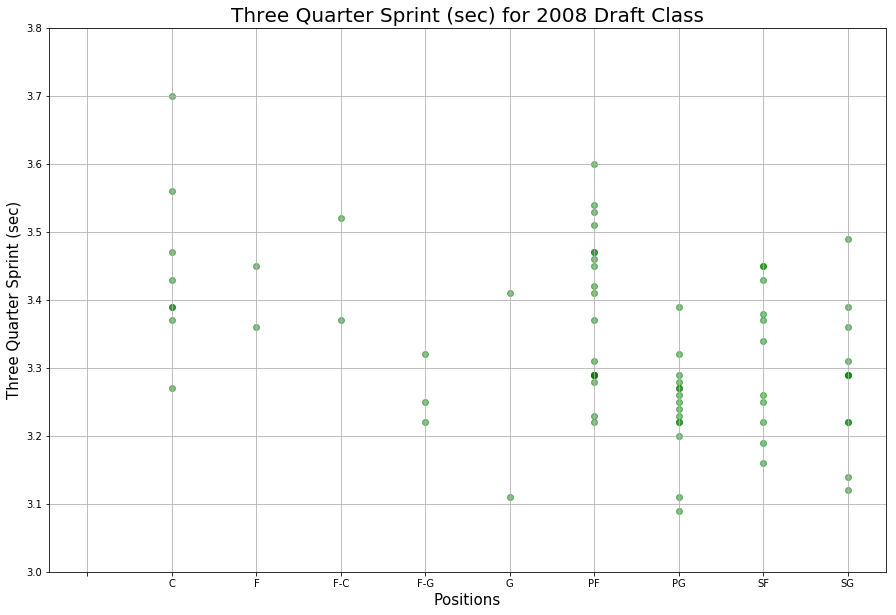

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(combine2008["Position"], combine2008["Three Quarter Sprint"], c='green', alpha=0.5)
plt.ylim(3,3.8)
plt.xlabel('Positions', fontsize=15)
plt.ylabel('Three Quarter Sprint (sec)', fontsize=15)
plt.title('Three Quarter Sprint (sec) for 2008 Draft Class', fontsize=20)
plt.grid()
plt.show()

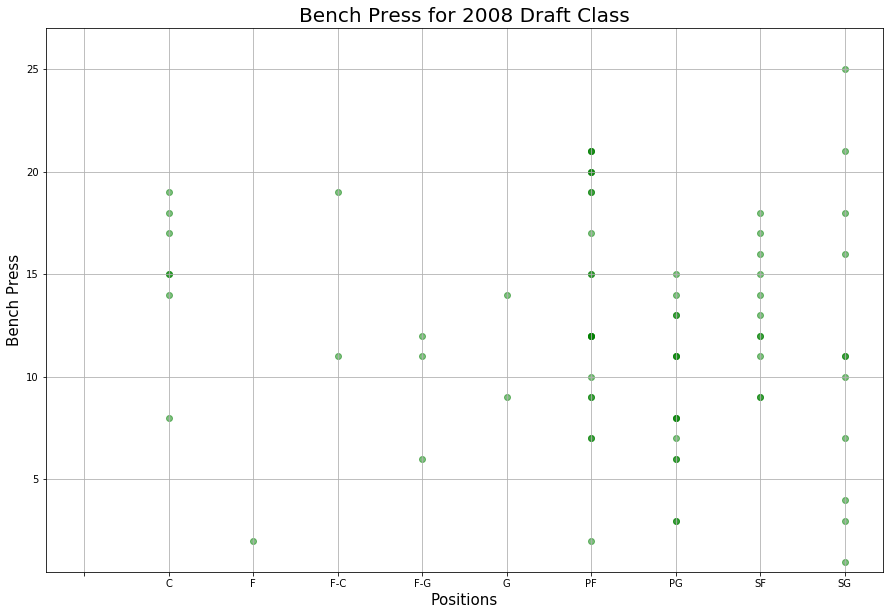

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(combine2008["Position"], combine2008["Bench Press"], c='green', alpha=0.5)
plt.ylim(.5,27)
plt.xlabel('Positions', fontsize=15)
plt.ylabel('Bench Press', fontsize=15)
plt.title('Bench Press for 2008 Draft Class', fontsize=20)
plt.grid()
plt.show()

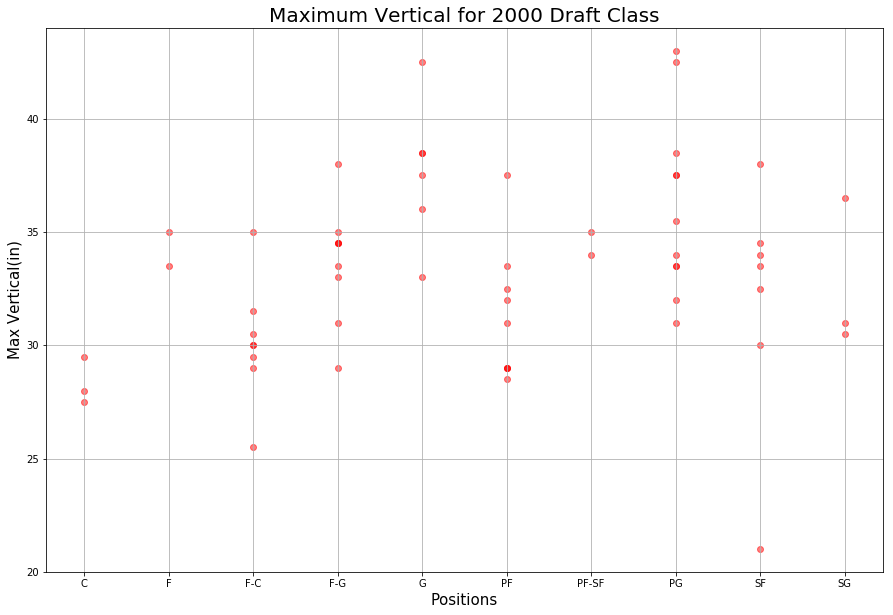

In [26]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(combine2000["Position"], combine2000["Max Vertical(in)"], c='red', alpha=0.5)
plt.ylim(20,44)
plt.xlabel('Positions', fontsize=15)
plt.ylabel('Max Vertical(in)', fontsize=15)
plt.title('Maximum Vertical for 2000 Draft Class', fontsize=20)
plt.grid()
plt.show()

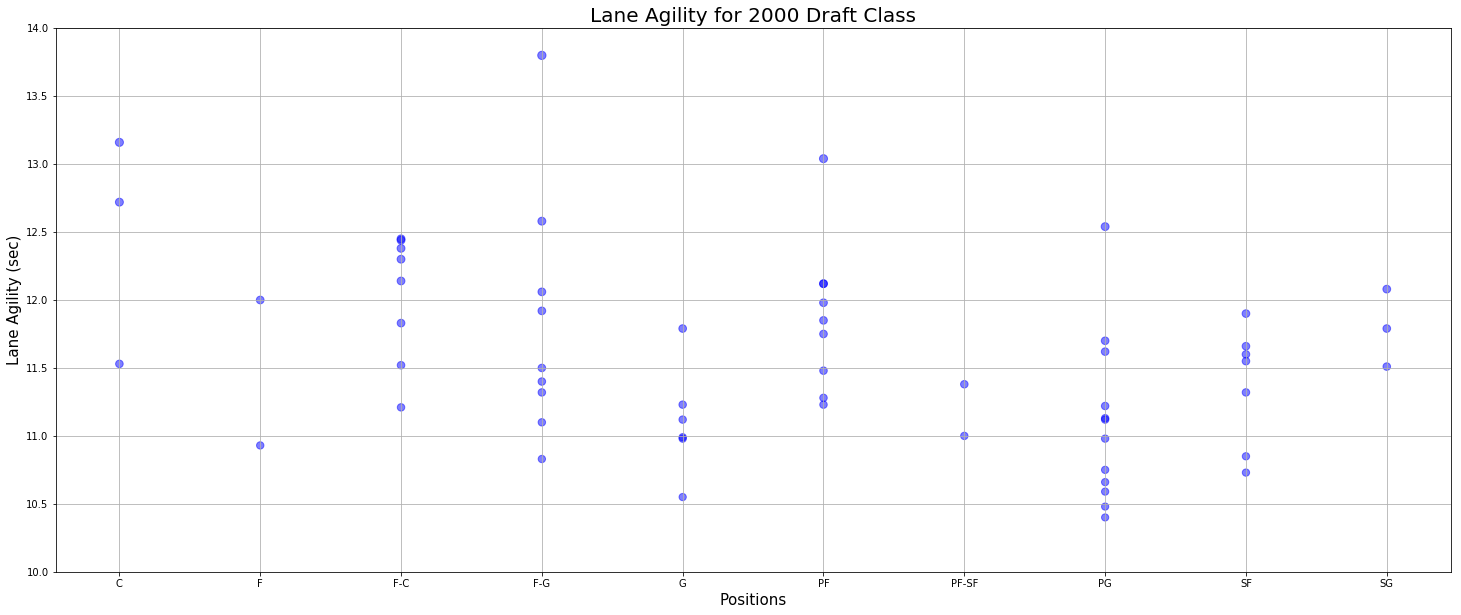

In [36]:
fig, ax = plt.subplots(figsize=(25,10))
plt.scatter(combine2000["Position"], combine2000["Lane Agility(sec)"], s=combine2000["Lane Agility(sec)"]*5, c='blue', alpha=0.5)
plt.ylim(10,14)
plt.xlabel('Positions', fontsize=15)
plt.ylabel('Lane Agility (sec)', fontsize=15)
plt.title('Lane Agility for 2000 Draft Class', fontsize=20)
plt.grid()
plt.show()

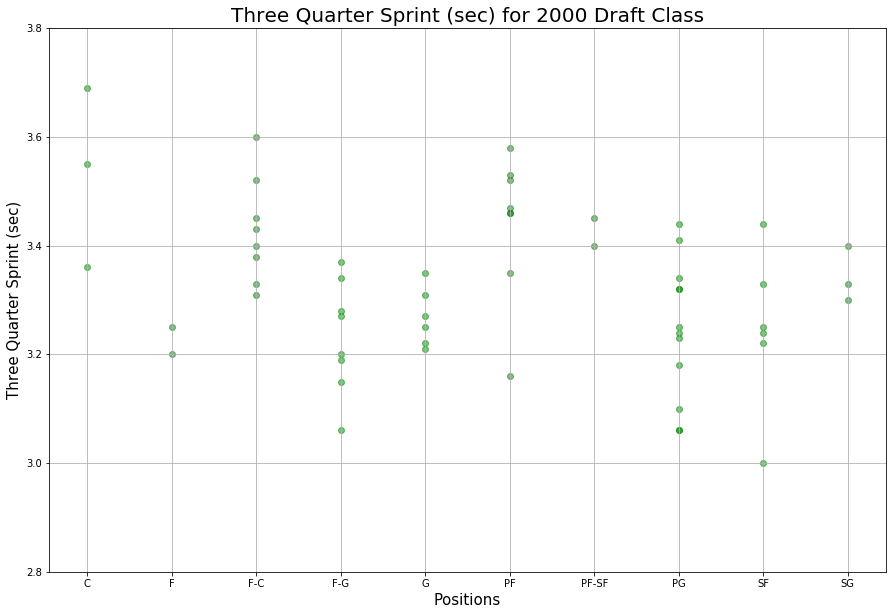

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(combine2000["Position"], combine2000["Three Quarter Sprint"], c='green', alpha=0.5)
plt.ylim(2.8,3.8)
plt.xlabel('Positions', fontsize=15)
plt.ylabel('Three Quarter Sprint (sec)', fontsize=15)
plt.title('Three Quarter Sprint (sec) for 2000 Draft Class', fontsize=20)
plt.grid()
plt.show()

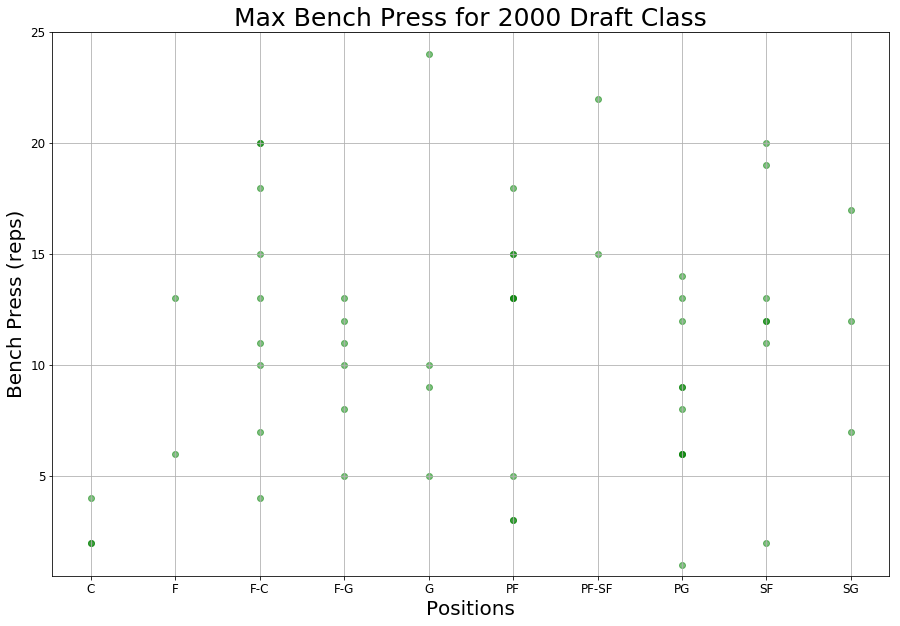

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(combine2000["Position"], combine2000["Bench Press"], c='green', alpha=0.5)
plt.ylim(.5,25)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Bench Press (reps)', fontsize=20)
plt.xlabel("Positions", fontsize=20)
plt.title('Max Bench Press for 2000 Draft Class', fontsize=25)
plt.grid()
plt.show()

In [41]:
print(combine2018.mean())
print('--------------------------------------------------')
print(combine2008.mean())
print('--------------------------------------------------')
print(combine2000.mean())

Standing Vertical(in)    23.920290
Max Vertical(in)         29.202899
Lane Agility(sec)         9.204928
Mod Lane Agility(sec)     2.576522
Three Quarter Sprint      2.596522
Bench Press               6.086957
dtype: float64
--------------------------------------------------
Standing Vertical(in)    28.545455
Max Vertical(in)         33.045455
Lane Agility(sec)        11.314156
Mod Lane Agility(sec)     0.000000
Three Quarter Sprint      3.202208
Bench Press              11.844156
dtype: float64
--------------------------------------------------
Standing Vertical(in)    26.392308
Max Vertical(in)         30.684615
Lane Agility(sec)        10.879846
Three Quarter Sprint      2.965846
Bench Press               9.169231
dtype: float64
